# Reference Information & Descriptions

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
from collections import Counter

In [4]:
from imblearn.over_sampling import RandomOverSampler

# Data Ingestion or Gathering

## Import Dataset

In [5]:
all = pd.read_csv('C:/Users/krism/OneDrive/Documents/UMGC/Current Courses/DATA 430/healthcare-dataset-stroke-data.csv')

# Initial Data Inspection & Cleaning

## Identify Columns & Data Types

In [6]:
all.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Info

In [7]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Description
Evaluate variable ranges for numerical values

In [8]:
all.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
all.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

## Simplify Data Types

In [10]:
all = all.astype({'hypertension':bool,'heart_disease':bool,'stroke':bool})

In [11]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   bool   
 4   heart_disease      5110 non-null   bool   
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 374.4+ KB


## Drop Columns

In [12]:
all = all.drop(columns='id')

## Search for Missing Data

In [13]:
all.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Split Dataset

In [14]:
stroke = all[all['stroke'] == 1]
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked,True
1,Female,61.0,False,False,Yes,Self-employed,Rural,202.21,NaN,never smoked,True
2,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked,True
3,Female,49.0,False,False,Yes,Private,Urban,171.23,34.4,smokes,True
4,Female,79.0,True,False,Yes,Self-employed,Rural,174.12,24.0,never smoked,True
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,False,False,Yes,Private,Rural,84.96,36.7,Unknown,True
245,Female,14.0,False,False,No,children,Rural,57.93,30.9,Unknown,True
246,Female,75.0,False,False,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,True
247,Male,71.0,True,False,Yes,Self-employed,Rural,87.80,NaN,Unknown,True


# Data Exploration

## Primary Dependent Variable: Stroke

In [15]:
all['stroke'].value_counts()

False    4861
True      249
Name: stroke, dtype: int64

[Text(0.5, 1.0, 'Figure 1.1: Stroke Status of Patient')]

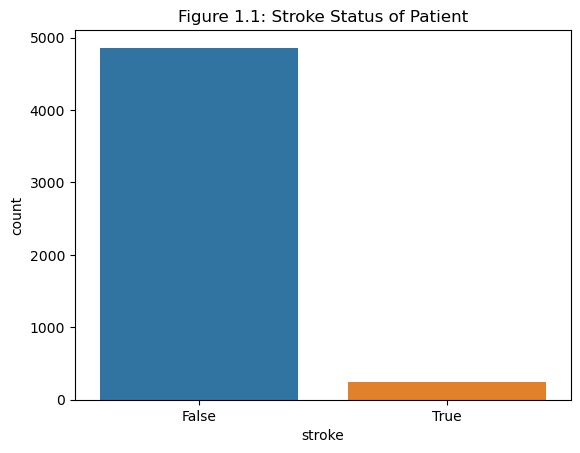

In [16]:
sns.countplot(data=all,x='stroke').set(title='Figure 1.1: Stroke Status of Patient')

## Correlation

### Plot Correlation Heatmap

In [17]:
all.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


[Text(0.5, 1.0, 'Figure 1.2: Correlation Heatmap')]

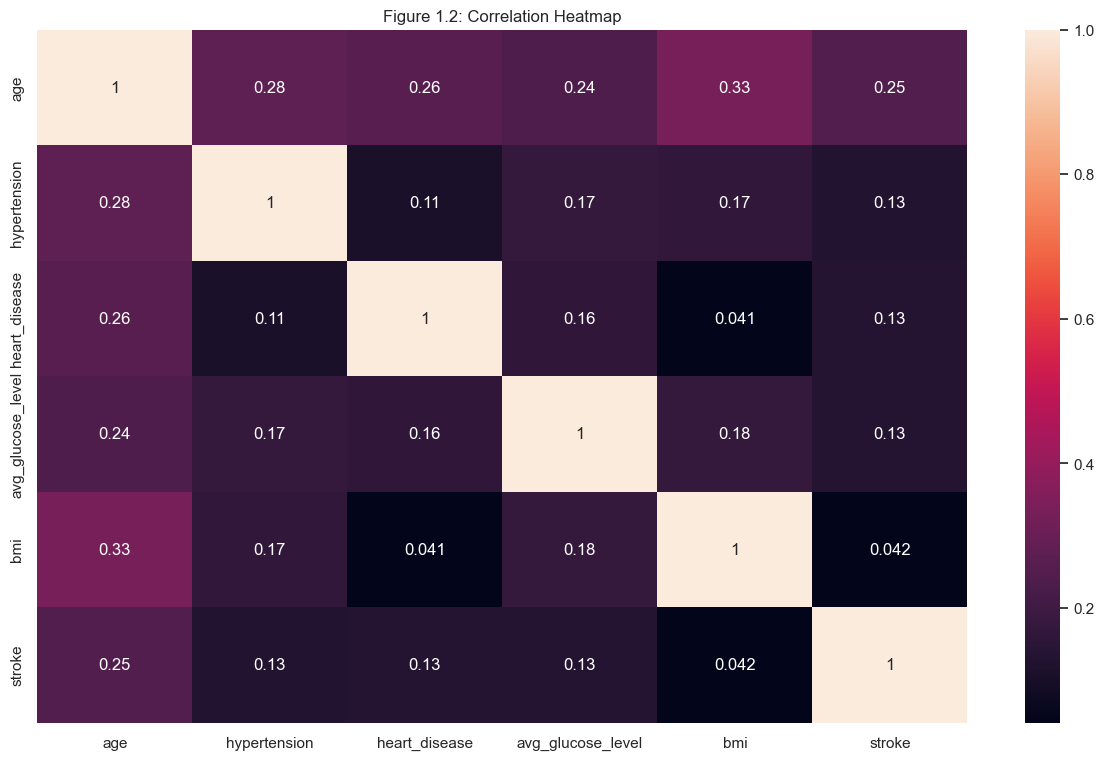

In [18]:
sns.set(rc = {'figure.figsize':(15,9)})
sns.heatmap(all.corr().abs(),annot=True).set(title='Figure 1.2: Correlation Heatmap')

## Categorical Variables

### Gender

In [19]:
all['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

[Text(0.5, 1.0, 'Figure 1.3: Gender Distribution by Stroke Status')]

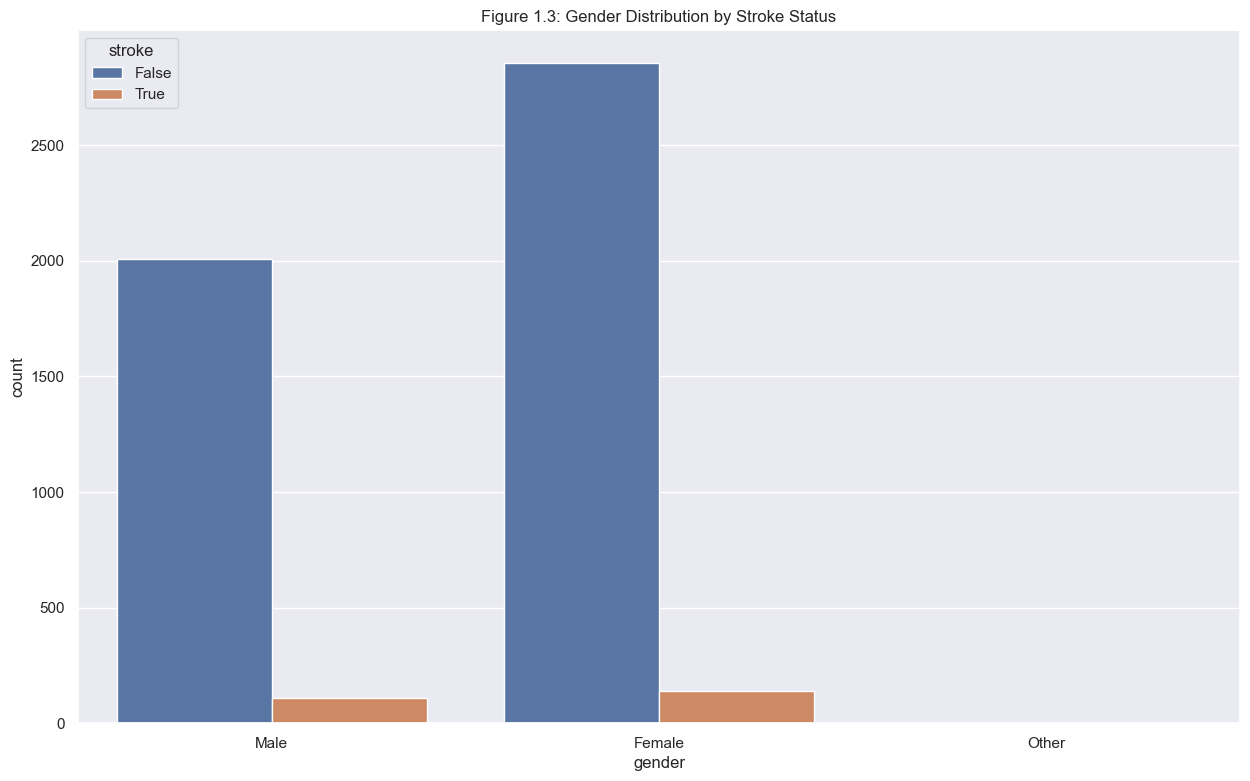

In [20]:
sns.countplot(data=all,x='gender',hue='stroke').set(title='Figure 1.3: Gender Distribution by Stroke Status')

### Work Type

In [21]:
all['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

[Text(0.5, 1.0, 'Figure 1.4: Work Type Distribution by Stroke Status')]

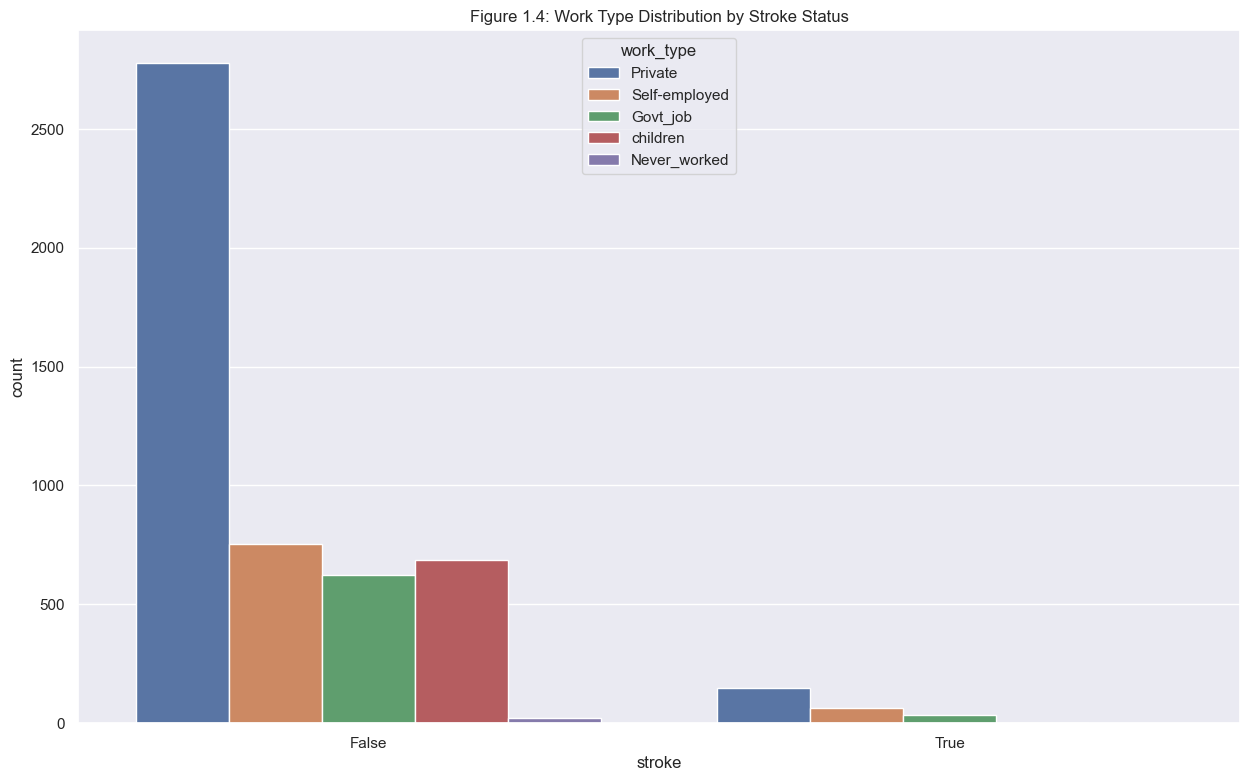

In [22]:
sns.countplot(data=all,x='stroke',hue='work_type').set(title='Figure 1.4: Work Type Distribution by Stroke Status')

### Residence Type

In [23]:
all['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

[Text(0.5, 1.0, 'Figure 1.5: Residence Type by Stroke Status')]

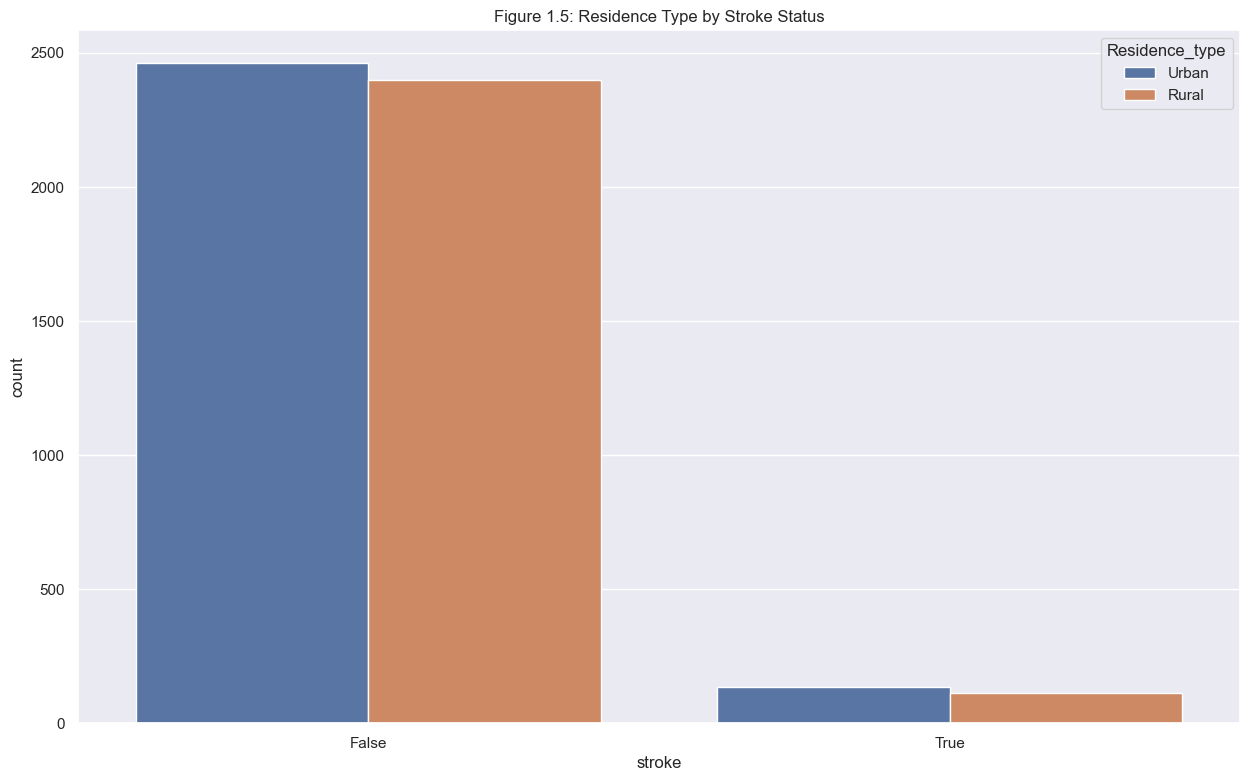

In [24]:
sns.countplot(data=all,x='stroke',hue='Residence_type').set(title="Figure 1.5: Residence Type by Stroke Status")

### Ever Married

In [25]:
all['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

[Text(0.5, 1.0, 'Figure 1.5: Marital History by Stroke Status')]

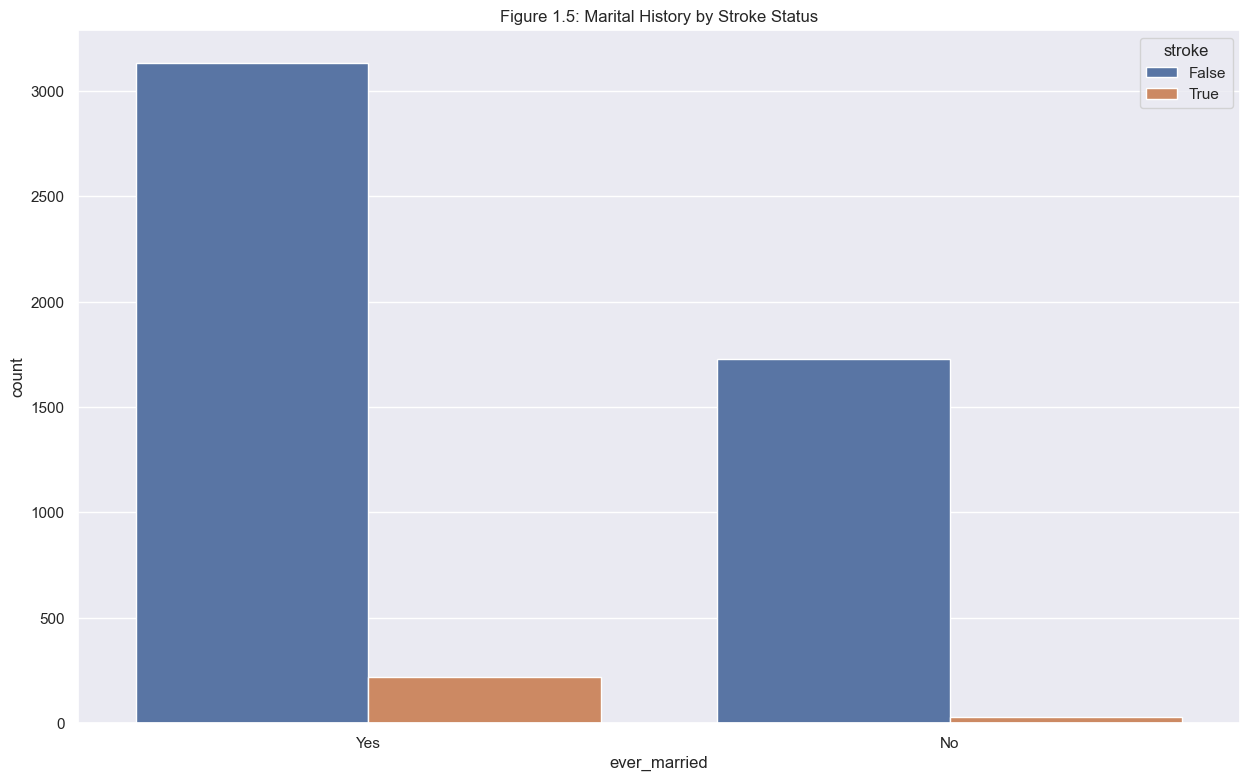

In [26]:
sns.countplot(data=all, x='ever_married',hue='stroke').set(title='Figure 1.5: Marital History by Stroke Status')

### Smoking Status

In [27]:
all['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

[Text(0.5, 1.0, 'Figure 1.6: Smoking History and Stroke Status')]

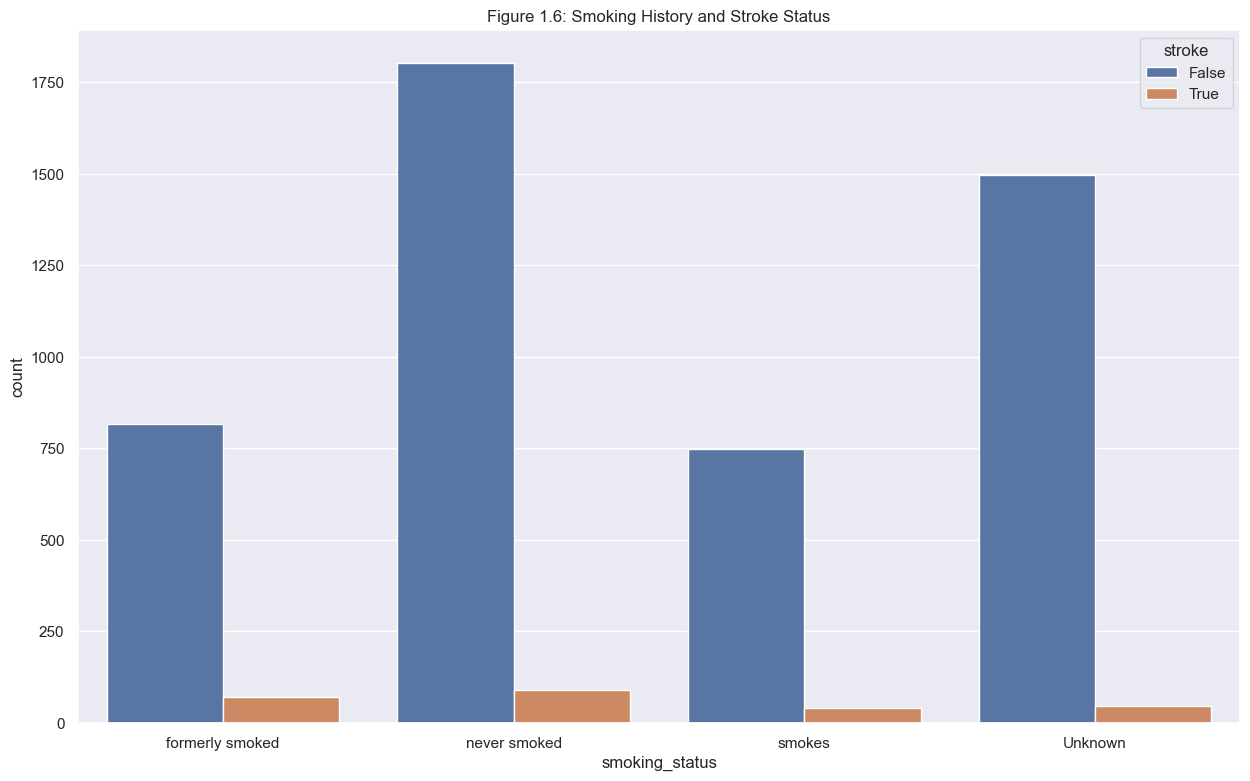

In [28]:
sns.countplot(data=all, x='smoking_status',hue='stroke').set(title='Figure 1.6: Smoking History and Stroke Status')

## Boolean Variables

### Hypertension

In [29]:
all['hypertension'].value_counts()

False    4612
True      498
Name: hypertension, dtype: int64

[Text(0.5, 1.0, 'Figure 1.7: Hypertension and Stroke Status')]

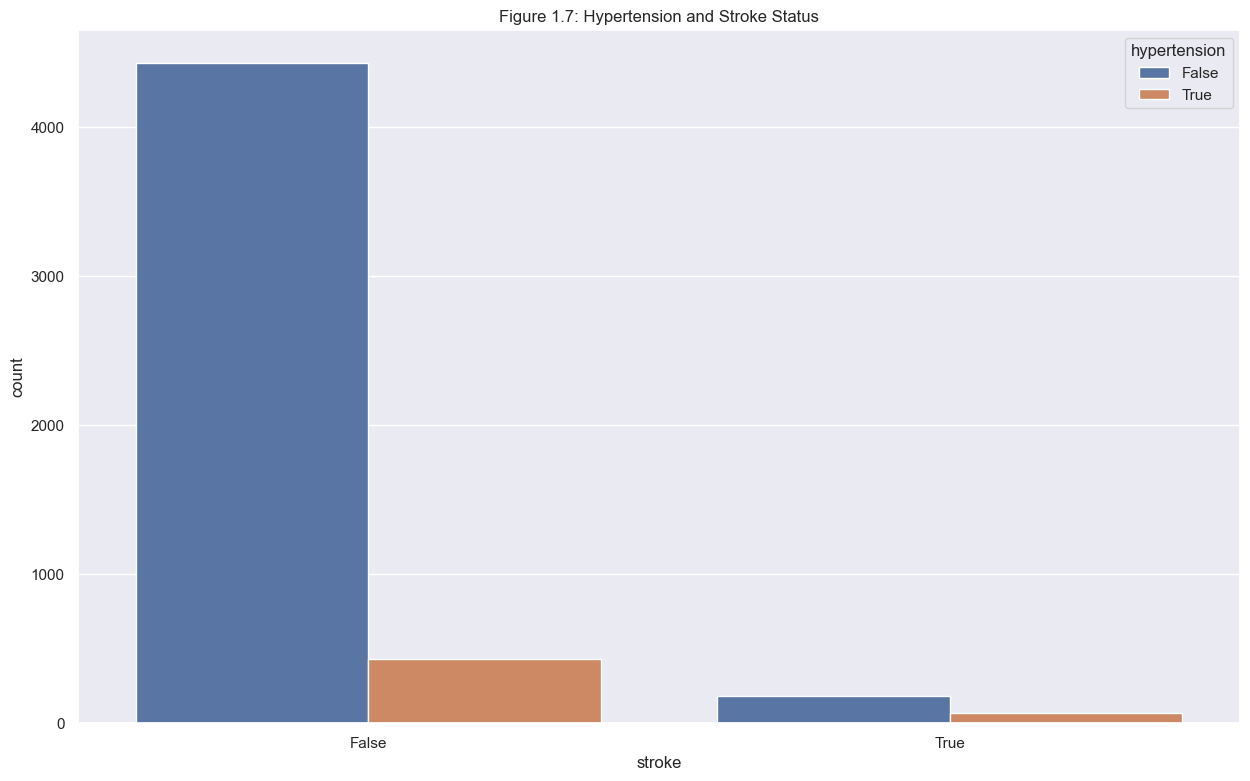

In [30]:
sns.countplot(data=all, x='stroke',hue='hypertension').set(title='Figure 1.7: Hypertension and Stroke Status')

### Heart Disease

In [31]:
all['heart_disease'].value_counts()

False    4834
True      276
Name: heart_disease, dtype: int64

[Text(0.5, 1.0, 'Figure 1.8: Heart Disease and Stroke Status')]

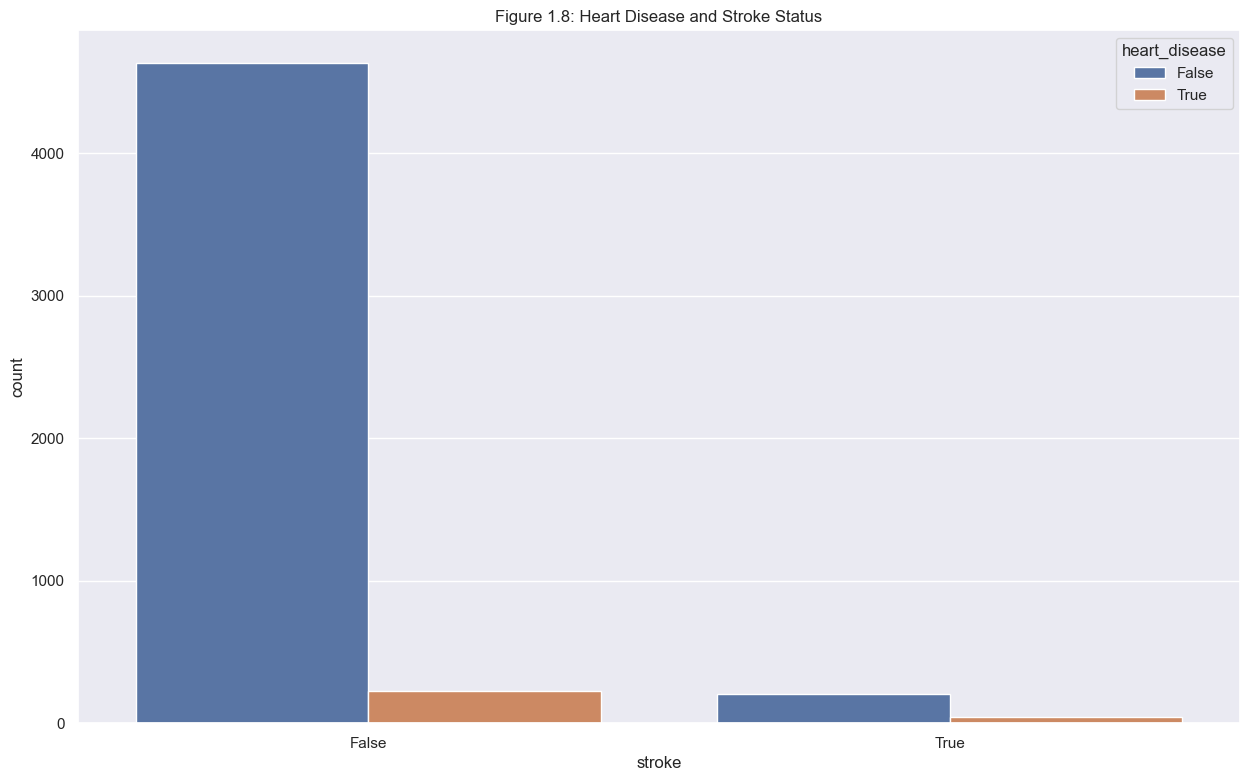

In [32]:
sns.countplot(data=all, x='stroke',hue='heart_disease').set(title='Figure 1.8: Heart Disease and Stroke Status')

## Numerical Variables

### Age

In [33]:
all['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

[Text(0.5, 1.0, 'Figure 2.1: Age Distribution')]

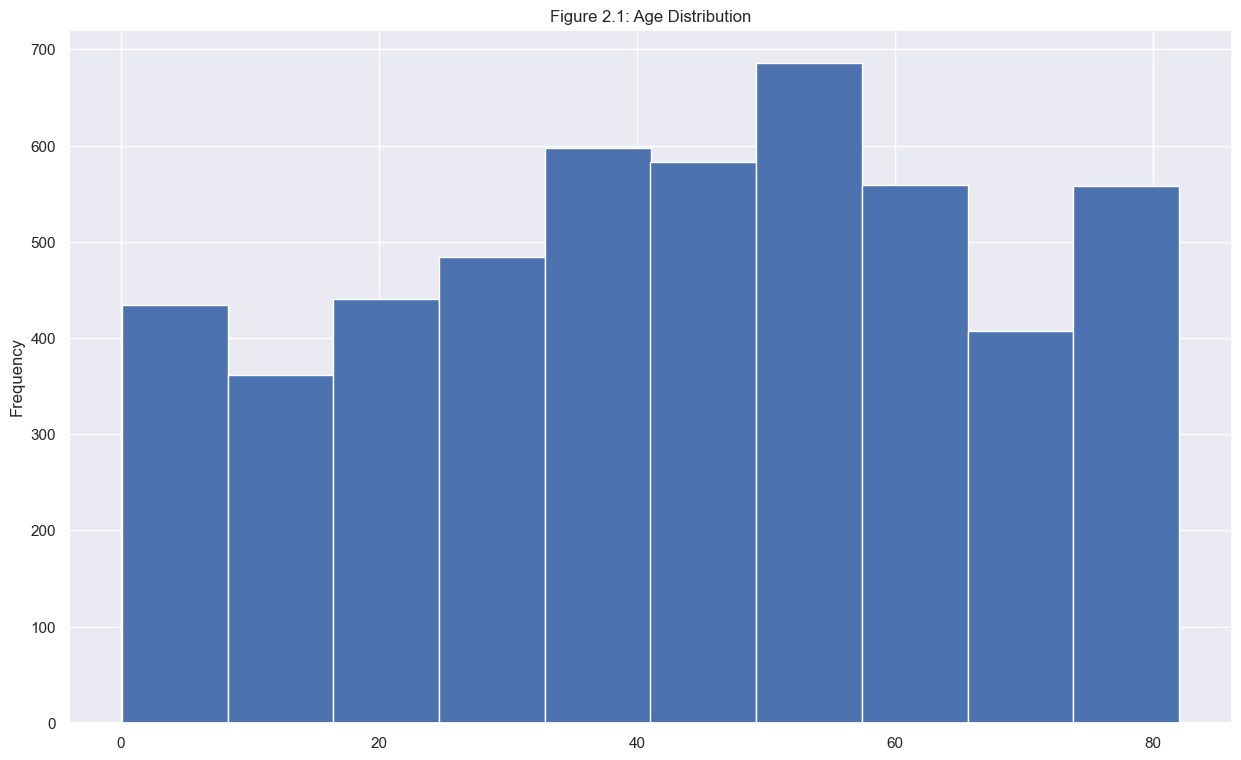

In [34]:
all['age'].plot(kind='hist').set(title='Figure 2.1: Age Distribution')

In [35]:
stroke['age'].describe()

count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

[Text(0.5, 1.0, 'Figure 2.2: Age Distribution of Stroke Patients')]

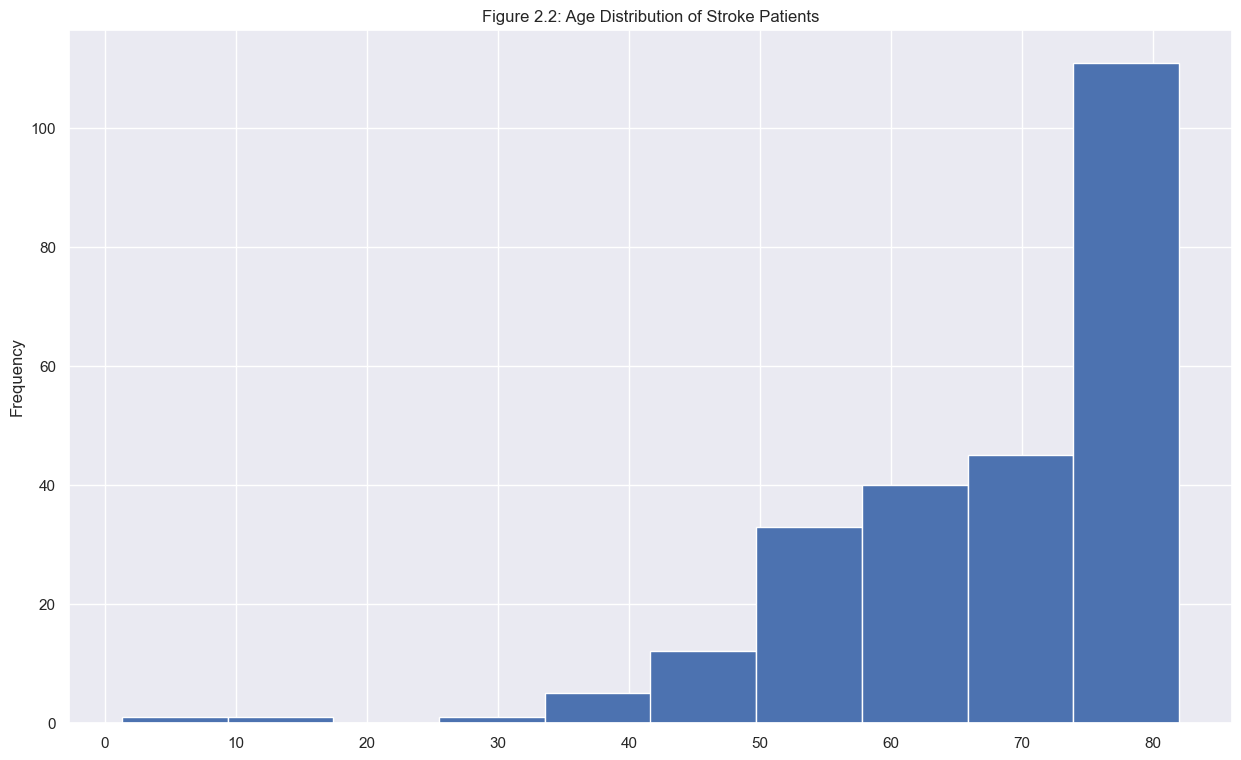

In [36]:
stroke['age'].plot(kind='hist').set(title='Figure 2.2: Age Distribution of Stroke Patients')

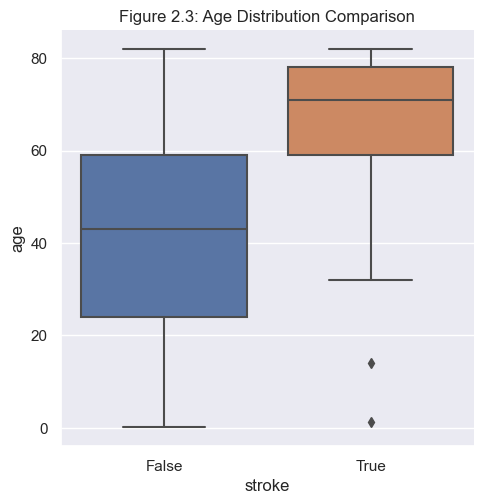

In [37]:
sns.catplot(data=all,x="stroke",y="age",kind="box").set(title='Figure 2.3: Age Distribution Comparison')
plt.show()

### Average Glucose Level

In [38]:
all['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [39]:
stroke['avg_glucose_level'].describe()

count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

[Text(0.5, 1.0, 'Figure 2.4: Blood Glucose Distribution')]

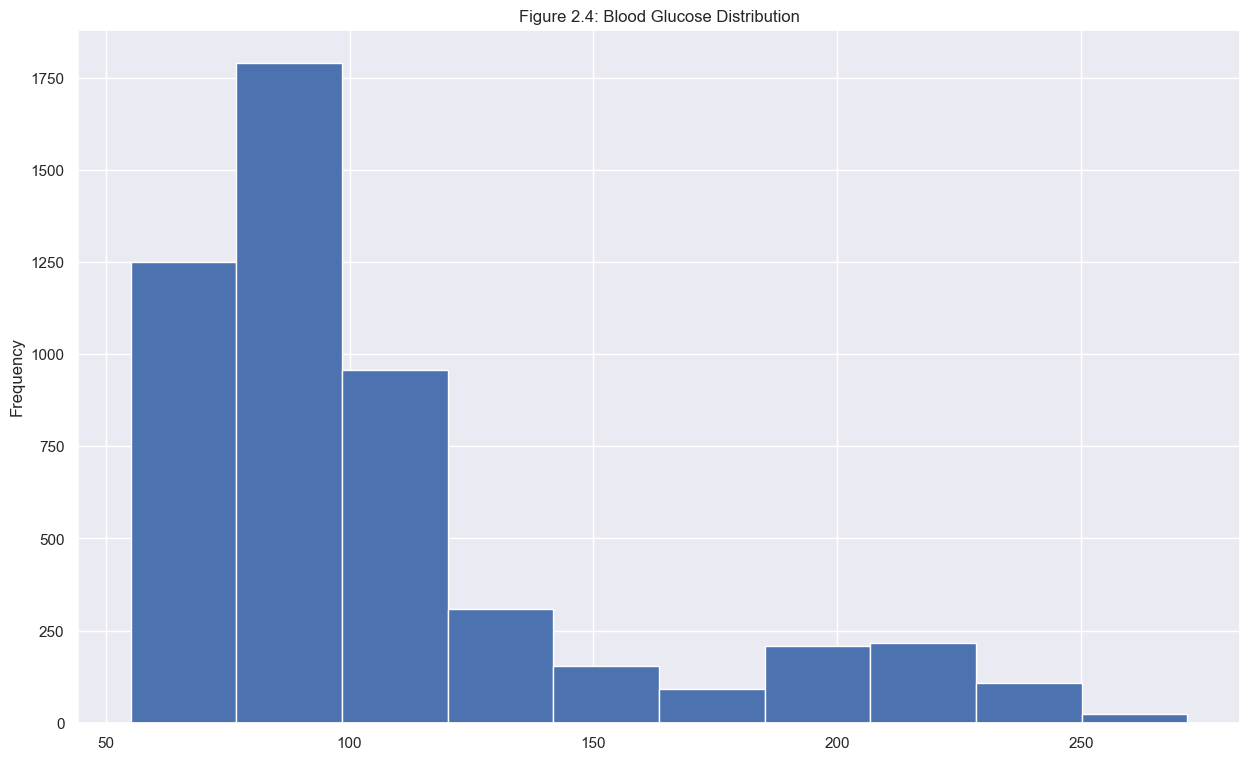

In [40]:
all['avg_glucose_level'].plot(kind='hist').set(title='Figure 2.4: Blood Glucose Distribution')

[Text(0.5, 1.0, 'Figure 2.5: Blood Glucose Distribution in Stroke Patients')]

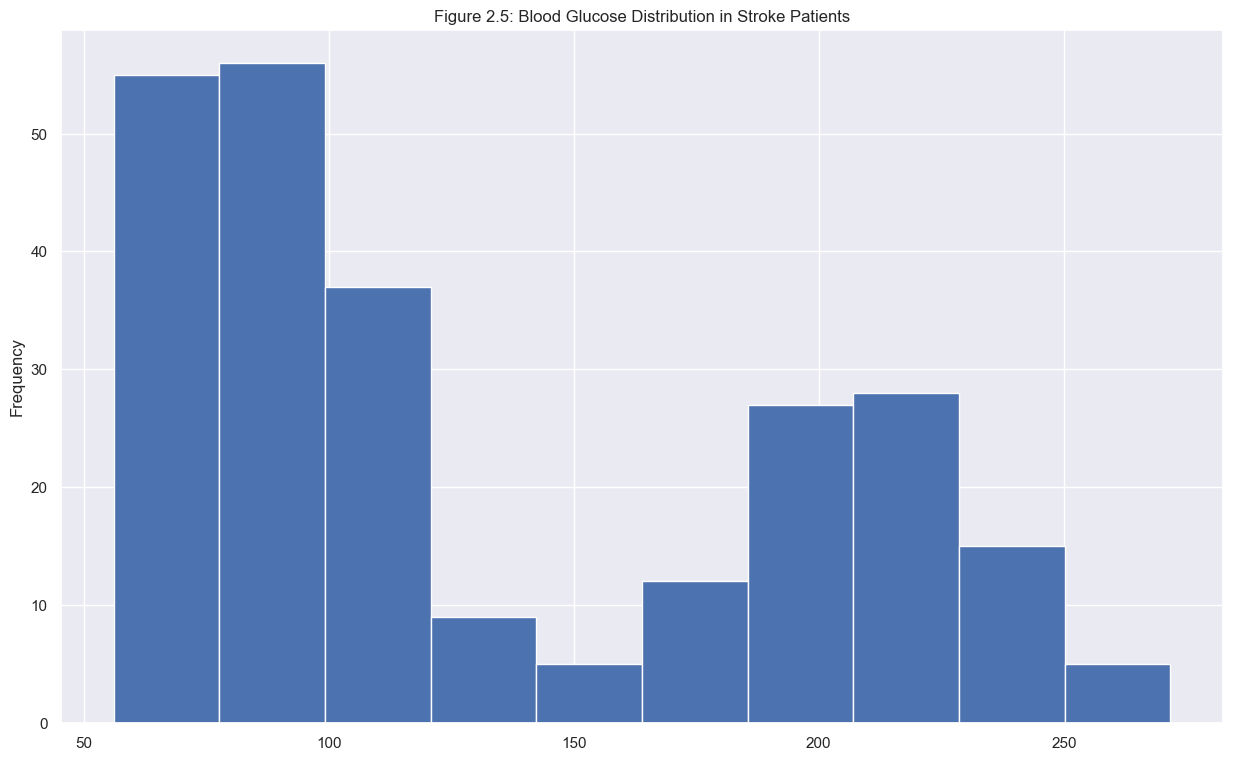

In [41]:
stroke['avg_glucose_level'].plot(kind='hist').set(title='Figure 2.5: Blood Glucose Distribution in Stroke Patients')

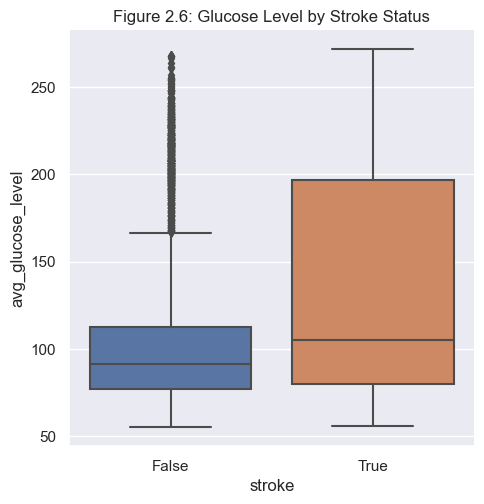

In [42]:
sns.catplot(data=all,x="stroke",y="avg_glucose_level",kind="box").set(title='Figure 2.6: Glucose Level by Stroke Status')
plt.show()

### BMI
Evaluate potential BMI outliers. BMI values from https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.htm. Expected values should be between 19 and 54

In [43]:
all['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

#### Map BMI Values

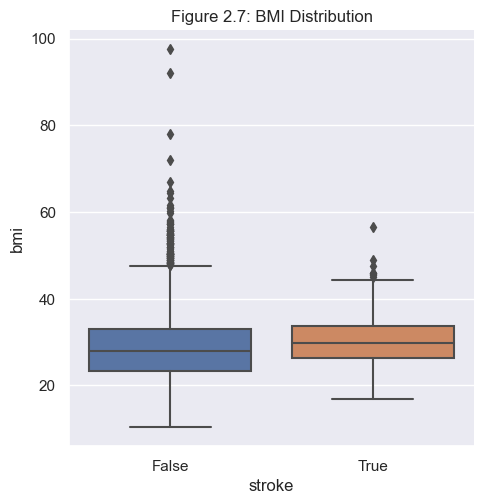

In [44]:
sns.catplot(data=all,x="stroke",y="bmi",kind="box")
plt.title("Figure 2.7: BMI Distribution")
plt.show()

#### Remove Outlier Values (< 12, > 60)

In [45]:
all['bmi'] = all['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

In [46]:
all.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4892.000000
mean,43.226614,106.147677,28.799714
std,22.612647,45.283560,7.541793
min,0.080000,55.120000,12.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.000000
75%,61.000000,114.090000,33.000000
max,82.000000,271.740000,59.700000


# Data Pre-Processing

## Reduce Variable Columns
Although it is valuable to review socioeconomic factors in stroke; for the purpose of this model, I will only be reviewing medical factors. 

In [47]:
all = all.drop(columns='ever_married')
all = all.drop(columns='Residence_type')
all = all.drop(columns='work_type')

## Replace NaN Values with Mean BMI

In [48]:
all['bmi']=all['bmi'].fillna(all['bmi'].mean())

### Rerun BMI Chart with Modified Values

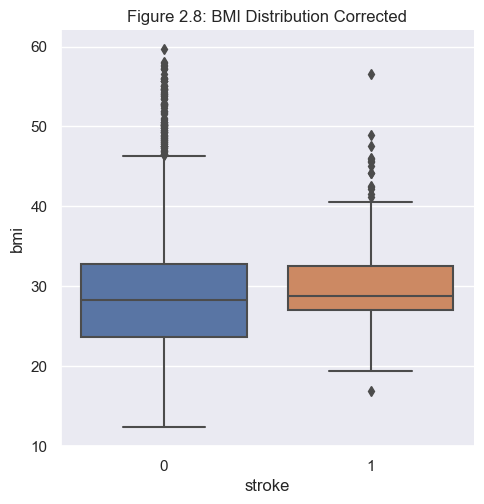

In [81]:
sns.catplot(data=all,x="stroke",y="bmi",kind="box")
plt.title("Figure 2.8: BMI Distribution Corrected")
plt.show()

## Exploratory Data Analysis

### Age & BMI

<function matplotlib.pyplot.show(close=None, block=None)>

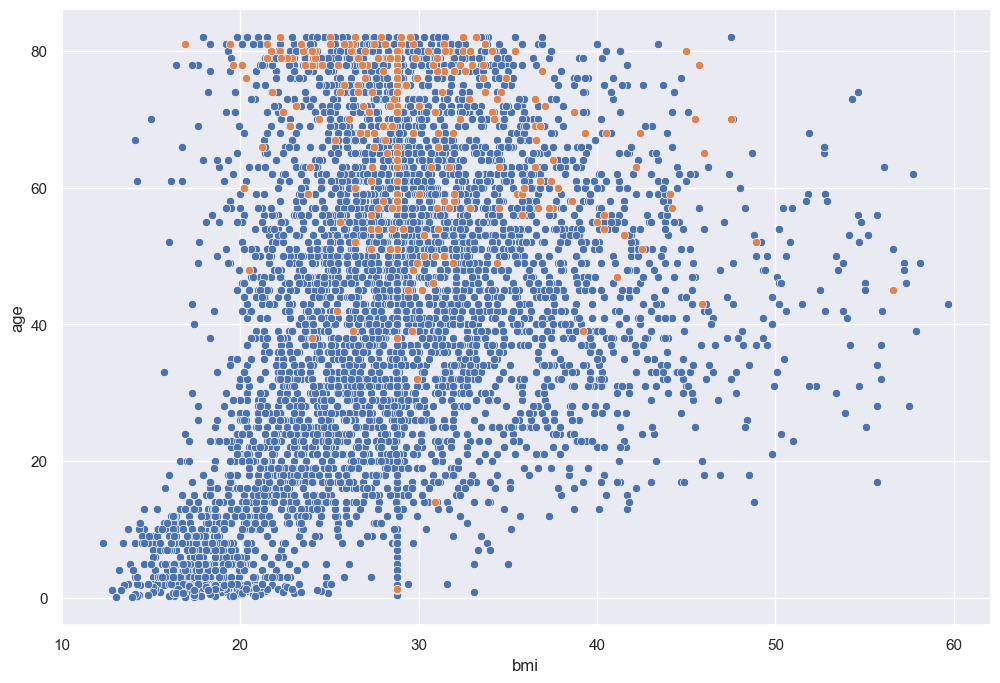

In [50]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='bmi',y='age',data=all[all['stroke'] == False])
sns.scatterplot(x='bmi',y='age',data=all[all['stroke'] == True], ax=ax)
plt.show

### BMI & Average Glucose Level

<function matplotlib.pyplot.show(close=None, block=None)>

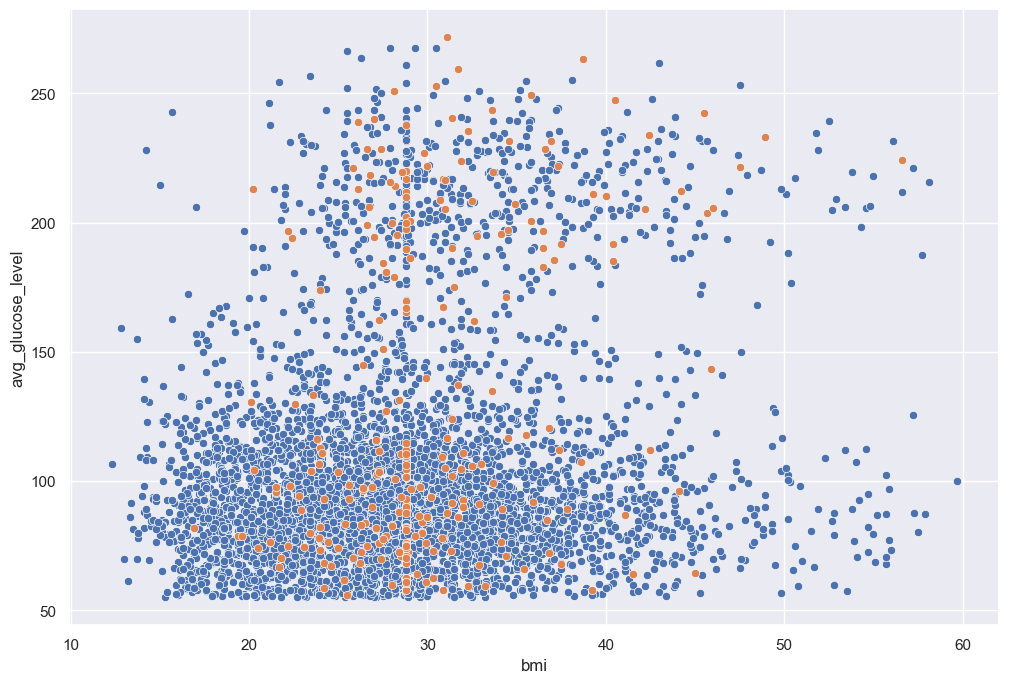

In [51]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='bmi',y='avg_glucose_level',data=all[all['stroke'] == False])
sns.scatterplot(x='bmi',y='avg_glucose_level',data=all[all['stroke'] == True], ax=ax)
plt.show

## Label Encoding
### Initialize One-Hot Encoder

In [52]:
all = pd.get_dummies(all, columns=None, drop_first=False)

In [53]:
all

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,False,True,228.69,36.600000,True,0,1,0,0,1,0,0
1,61.0,False,False,202.21,28.799714,True,1,0,0,0,0,1,0
2,80.0,False,True,105.92,32.500000,True,0,1,0,0,0,1,0
3,49.0,False,False,171.23,34.400000,True,1,0,0,0,0,0,1
4,79.0,True,False,174.12,24.000000,True,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,True,False,83.75,28.799714,False,1,0,0,0,0,1,0
5106,81.0,False,False,125.20,40.000000,False,1,0,0,0,0,1,0
5107,35.0,False,False,82.99,30.600000,False,1,0,0,0,0,1,0
5108,51.0,False,False,166.29,25.600000,False,0,1,0,0,1,0,0


### Initialize Label Encoder

In [54]:
le = LabelEncoder()

In [55]:
all['stroke']=le.fit_transform(all['stroke'])

In [56]:
le.classes_

array([False,  True])

In [57]:
all['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [58]:
all['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Shuffle the Dataset

In [59]:
all = shuffle(all)

In [60]:
all

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4312,39.0,True,False,111.24,38.8,0,0,1,0,0,0,1,0
5070,5.0,False,False,61.98,16.8,0,1,0,0,1,0,0,0
4070,66.0,False,False,96.19,38.3,0,0,1,0,0,0,0,1
793,29.0,False,False,101.28,22.7,0,1,0,0,0,0,1,0
4440,55.0,False,False,82.26,28.7,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,44.0,False,False,82.33,24.5,0,1,0,0,0,0,1,0
111,80.0,False,True,68.53,24.2,1,0,1,0,0,0,0,1
4754,52.0,False,False,67.92,31.1,0,0,1,0,0,0,1,0
4899,65.0,False,False,198.84,33.2,0,0,1,0,0,1,0,0


### Split into X and Y

In [61]:
X = all.drop(['stroke'],axis=1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4312,39.0,True,False,111.24,38.8,0,1,0,0,0,1,0
5070,5.0,False,False,61.98,16.8,1,0,0,1,0,0,0
4070,66.0,False,False,96.19,38.3,0,1,0,0,0,0,1
793,29.0,False,False,101.28,22.7,1,0,0,0,0,1,0
4440,55.0,False,False,82.26,28.7,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3542,44.0,False,False,82.33,24.5,1,0,0,0,0,1,0
111,80.0,False,True,68.53,24.2,0,1,0,0,0,0,1
4754,52.0,False,False,67.92,31.1,0,1,0,0,0,1,0
4899,65.0,False,False,198.84,33.2,0,1,0,0,1,0,0


In [62]:
y = all['stroke']
y

4312    0
5070    0
4070    0
793     0
4440    0
       ..
3542    0
111     1
4754    0
4899    0
3884    0
Name: stroke, Length: 5110, dtype: int64

## Balance Dataset

### Summarize Class Distribution

In [63]:
print(Counter(y))

Counter({0: 4861, 1: 249})


### Define Oversampling Strategy

In [64]:
oversample = RandomOverSampler(sampling_strategy='minority')

### Fit and Apply the Transform

In [65]:
X, y = oversample.fit_resample(X, y)

### Summarize Class Distribution

In [66]:
print(Counter(y))

Counter({0: 4861, 1: 4861})


In [67]:
X.shape

(9722, 12)

### Normalize the Dataset

In [68]:
scaler_m = MinMaxScaler()

In [69]:
X = scaler_m.fit_transform(X.values)

In [70]:
X.shape

(9722, 12)

## Training

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

## Modeling

In [72]:
lr = LogisticRegression(max_iter=10000,
                        class_weight='balanced',
                        solver='saga',
                        C = 0.2)

### Train the Model

In [73]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, class_weight='balanced', max_iter=10000,
                   solver='saga')

In [74]:
lr.score(X_test, y_test)

0.7689406924922866

In [75]:
y_pred = lr.predict(X_test)

### Evaluation

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1014,  425],
       [ 249, 1229]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1439
           1       0.74      0.83      0.78      1478

    accuracy                           0.77      2917
   macro avg       0.77      0.77      0.77      2917
weighted avg       0.77      0.77      0.77      2917



 ### Plot Confusion Matrix

Text(92.25, 0.5, 'Actual')

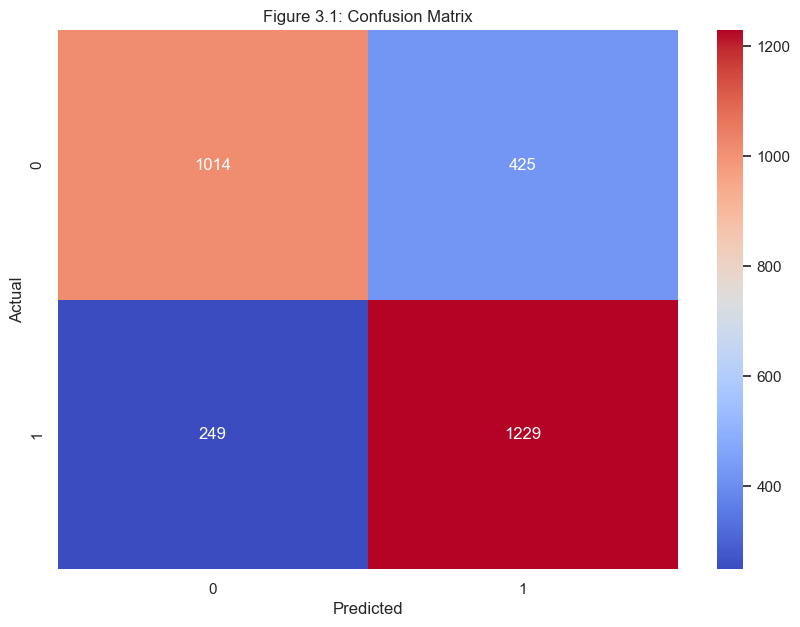

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm').set(title='Figure 3.1: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Plot ROC / AUC Curve

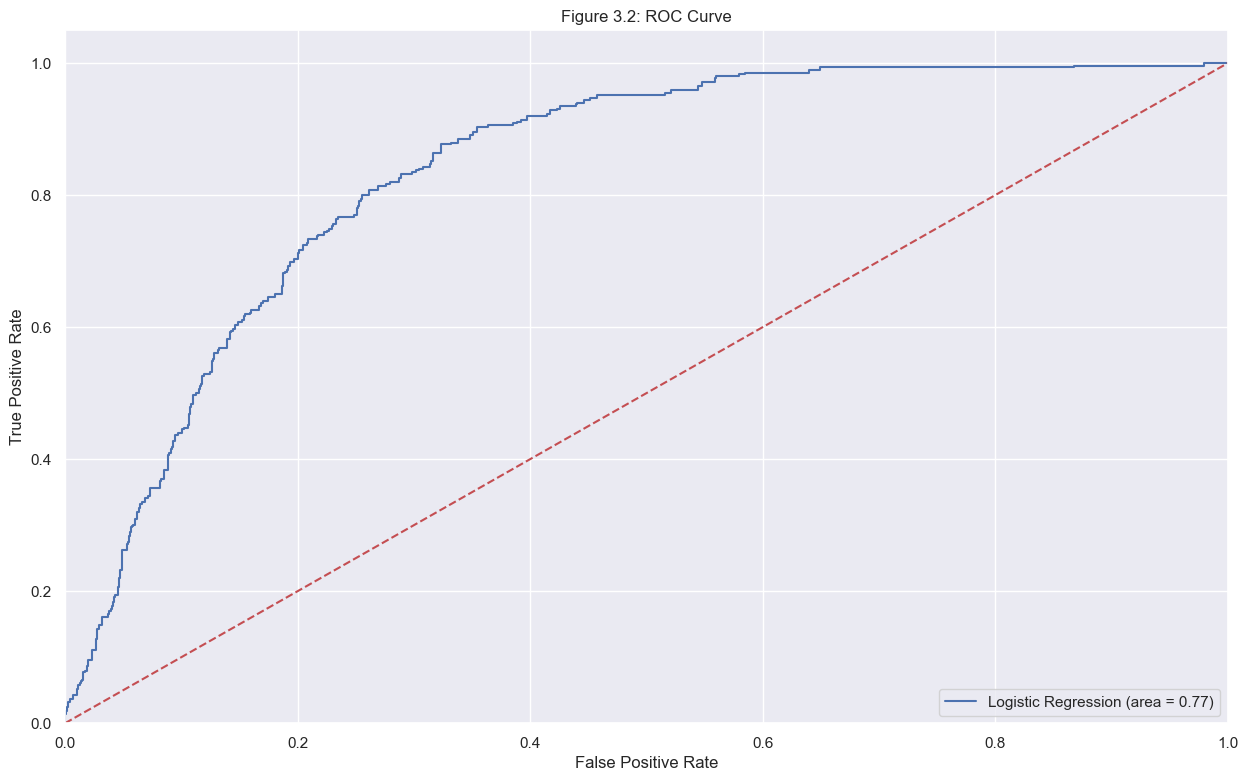

In [84]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 3.2: ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()